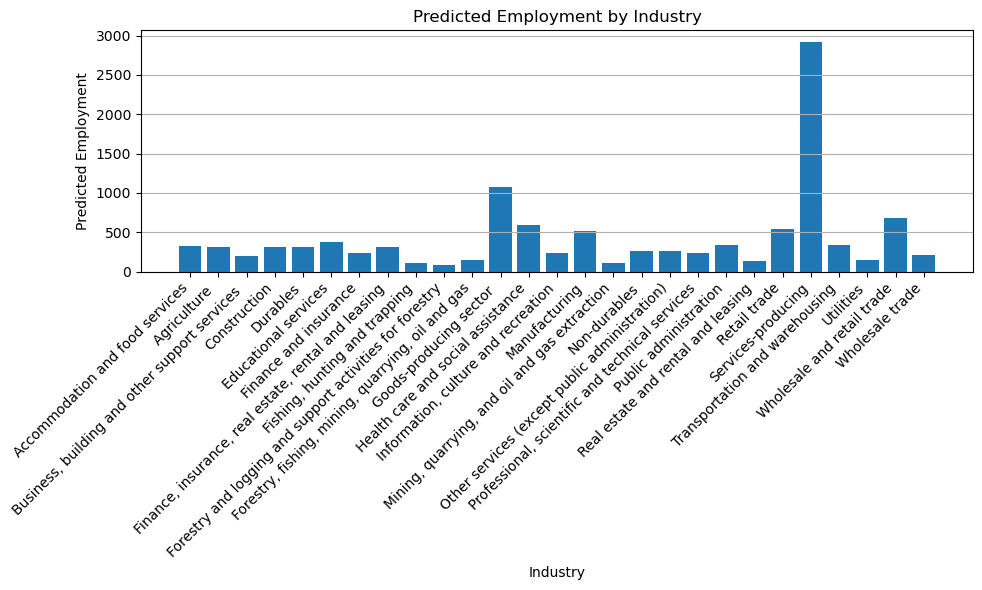

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt  # Import Matplotlib

# Load data for Newfoundland and Prince Edward Island
df_mb = pd.read_csv('Manitoba Sector.csv')

# Drop rows with missing or non-numeric values in the 'Employment' column
df_mb = df_mb[pd.to_numeric(df_mb['Employment'], errors='coerce').notnull()]

# Split the data into features (X) and target variable (y)
X = df_mb[['Year', 'Industry']]
y = df_mb['Employment'].astype(float)  # Convert 'Employment' to float

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# One-hot encode the 'Industry' column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Create a dataframe with the Cartesian product of years and unique industries
years = range(2024, 2031)
industries = df_mb['Industry'].unique()
future_years = pd.DataFrame([(year, industry) for year in years for industry in industries], columns=['Year', 'Industry'])

# One-hot encode the 'Industry' column in future_years
future_years_encoded = ct.transform(future_years[['Year', 'Industry']])

# Predict future employment for the next 5 years
future_predictions = model.predict(future_years_encoded)

# Assign the corresponding industries to future_years
future_years['Predicted Employment Manitoba'] = future_predictions.round(1)

# Aggregate predicted employment by industry
predicted_employment_by_industry = future_years.groupby('Industry')['Predicted Employment Manitoba'].sum().reset_index()

# Save the predicted future employment with industries to a CSV file
future_years.to_csv('predicted_Manitoba_employment_sector.csv', index=False)

# Plot a bar chart of predicted employment by industry
plt.figure(figsize=(10, 6))
plt.bar(predicted_employment_by_industry['Industry'], predicted_employment_by_industry['Predicted Employment Manitoba'])
plt.xlabel('Industry')
plt.ylabel('Predicted Employment')
plt.title('Predicted Employment by Industry')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()